# SEM TEXT ANALYSIS FINAL

### Import Packages

In [3]:
%run clusterTransformers.py
!pwd

/Users/austinlackey/Documents/GitHub/nps-sem/Code


### PRE-PROCESSING Convert Data to parquet for faster processing

In [10]:
coded_data = preprocess_data(rawData='national_sem_multiyear.xlsx', dictData='national_sem_dict.xlsx', update_geodesic=False, save=False)
coded_data

Added the users geodesic data.
Data Coded.


orig_index     n_IQualtricsID s_QualtricsLang  \
0               0  R_iujoTN1eudm9HPK              EN   
1               1  R_d3dAVKdyNxuhFU9              EN   
2               2  R_9wLWPUOBVxzFSr1              EN   
3               3  R_ntFLAszrjJ31KFp              EN   
4               4  R_naN4paHPE9DbXfJ              EN   
...           ...                ...             ...   
38816       38816  R_nxLP9imXzHYCdfs              EN   
38817       38817  R_nYJyTmgmU9OB4w1              EN   
38818       38818  R_oK65A5SEB0BvXYB              EN   
38819       38819  R_oOuGX1IIPpQfRHe              EN   
38820       38820  R_oppG4NBO1rQRmHv              EN   

                          s_residence  n_loczip s_us_int s_country_int  \
0                                  No       NaN      Yes           NaN   
1                                  No       NaN      Yes           NaN   
2                                  No       NaN      Yes           NaN   
3      Yes, I am a permanent resident   84023.0      Yes           NaN   
4                                  No       NaN      Yes           NaN   
...                               ...       ...      ...           ...   
38816  Yes, I am a permanent resident   37115.0      Yes           NaN   
38817                              No       NaN       No        Canada   
38818                              No       NaN      Yes           NaN   
38819  Yes, I am a permanent resident   38401.0      Yes           NaN   
38820                              No       NaN      Yes           NaN   

       n_zip_int s_primary                                      s_purpose  \
0        80219.0       Yes                                            NaN   
1        43549.0        No  The primary reason you came to the local area   
2        80123.0        No              An incidental or spontaneous stop   
3            NaN       NaN                                            NaN   
4        80424.0       Yes                                            NaN   
...          ...       ...                                            ...   
38816        NaN       NaN                                            NaN   
38817        NaN       Yes                                            NaN   
38818    39209.0       Yes                                            NaN   
38819        NaN       NaN                                            NaN   
38820    77437.0        No  The primary reason you came to the local area   

       ...  x_user_place_name x_user_state_name x_user_state_code  \
0      ...             Denver          Colorado                CO   
1      ...                Ney              Ohio                OH   
2      ...          Littleton          Colorado                CO   
3      ...                NaN               NaN               NaN   
4      ...       Breckenridge          Colorado                CO   
...    ...                ...               ...               ...   
38816  ...                NaN               NaN               NaN   
38817  ...                NaN               NaN               NaN   
38818  ...            Jackson       Mississippi                MS   
38819  ...                NaN               NaN               NaN   
38820  ...           El Campo             Texas                TX   

      x_user_county_name x_user_latitude  x_user_longitude  \
0                 Denver         39.6956         -105.0341   
1               Defiance         41.3781          -84.5269   
2              Jefferson         39.6206         -105.0901   
3                    NaN             NaN               NaN   
4                 Summit         39.4753         -106.0225   
...                  ...             ...               ...   
38816                NaN             NaN               NaN   
38817                NaN             NaN               NaN   
38818              Hinds         32.3184          -90.2446   
38819                NaN             NaN               NaN   
38820    

### Number of columns that start with 's_'

In [17]:
len([x for x in coded_data.columns if x.startswith('s_')])
len(coded_data.columns)

356

In [46]:
# return distinct list of coded_data unitcode values and sort by alphabetical order
sorted(coded_data['x_unitcode'].unique())

['AZRU',
 'BADL',
 'CACH',
 'CAHA',
 'CARE',
 'CATO',
 'CUGA',
 'CUVA',
 'DEWA',
 'DINO',
 'EDIS',
 'EVER',
 'FEHA',
 'FOBO',
 'FODO',
 'FOLA',
 'FRDE',
 'GARI',
 'GEGR',
 'GOGA',
 'GRBA',
 'GREE',
 'GRKO',
 'GRTE',
 'GUMO',
 'GWMP',
 'ISRO',
 'JEFF',
 'JEFM',
 'KLGO',
 'KOWA',
 'LAMR',
 'LAVO',
 'MAMC',
 'MAVA',
 'MORR',
 'MORU',
 'NACE',
 'NATR',
 'NCPC',
 'NIOB',
 'PINN',
 'PRWI',
 'ROMO',
 'SAJU',
 'STRI',
 'TUAI',
 'VAMA']

### Listing all Variable Names

In [18]:
for col in coded_data.columns:
    print('\'', col, '\', ', sep='')

'orig_index', 
'n_IQualtricsID', 
's_QualtricsLang', 
's_residence', 
'n_loczip', 
's_us_int', 
's_country_int', 
'n_zip_int', 
's_primary', 
's_purpose', 
'n_locdays', 
's_overnight', 
'm_accom_ocamp', 
'm_accom_olodge', 
'm_accom_unpaid', 
'n_nightsocamp', 
'n_nightsolodge', 
'n_nightsunpaid', 
'o_checkdaysnights', 
'n_adults', 
'n_children', 
'n_adage_1', 
'n_adage_2', 
'n_adage_3', 
'n_adage_4', 
'n_adage_5', 
'n_adage_6', 
'n_cage_1', 
'n_cage_2', 
'n_cage_3', 
'n_cage_4', 
'n_cage_5', 
'n_cage_6', 
'n_split', 
's_fee', 
'o_fee', 
's_visit', 
's_hour', 
'n_hours', 
'n_minutes', 
'n_days', 
'n_diffdays', 
's_reenter', 
'n_times', 
's_entermode', 
'o_entermode', 
's_enterwater', 
'o_enterwater', 
'n_carnum', 
'n_rvnum', 
'n_motonum', 
's_commercial', 
'n_commcost', 
'n_commlength', 
's_commlodge', 
'n_commpeople', 
's_first', 
'n_yearvisit', 
'n_fivevisit', 
'n_othervisit', 
's_mailback', 
'n_ID', 
's_address', 
's_usaddress', 
'o_zipflag', 
'o_zipflag2', 
'd_date', 
'n_comboZIP', 


### Un-pivot Data

In [11]:
xbi_info = pd.melt(coded_data, id_vars=['n_IQualtricsID', 'weight_peak'], value_vars=['m_info_none', 
                    'm_info_previous', 
                    'm_info_friends', 
                    'm_info_call', 
                    'm_info_site', 
                    'm_info_osite', 
                    'm_info_local', 
                    'm_info_maps', 
                    'm_info_news', 
                    'm_info_units', 
                    'm_info_school', 
                    'm_info_social', 
                    'm_info_center', 
                    'm_info_tele', 
                    'm_info_ota', 
                    'm_info_book', 
                    'm_info_cruise', 
                    'm_info_grew', 
                    'm_info_other'], var_name='xbi_info', value_name='xbi_info_value')
xbi_info.dropna(subset=['xbi_info_value'], inplace=True)
xbi_info = xbi_info.replace({'m_info_none': 'Did not obtain infomation prior to visit', 
                    'm_info_previous': 'Previous visits', 
                    'm_info_friends': 'Friends/relatives/word of mouth', 
                    'm_info_call': 'Inquiry to park via phone/mail/email', 
                    'm_info_site': 'Official Park website', 
                    'm_info_osite': 'Other website', 
                    'm_info_local': 'Local businesses', 
                    'm_info_maps': 'Maps/brochures', 
                    'm_info_news': 'Newspaper/magazine articles', 
                    'm_info_units': 'Other units of the National Park System', 
                    'm_info_school': 'School class/program', 
                    'm_info_social': 'Social media', 
                    'm_info_center': 'State welcome center/visitor bureaus/chamber of commerce', 
                    'm_info_tele': 'Television/radio programs/DVDs', 
                    'm_info_ota': 'Online travel agent', 
                    'm_info_book': 'Travel guides/tour books', 
                    'm_info_cruise': 'Cruise ship', 
                    'm_info_grew': 'Live here/grew up here', 
                    'm_info_other': 'Other',
                    'Not Selected': 0,
                    'Selected': 1})
xbi_info.reset_index(drop=True)
xbi_info['xbi_info_value'] = np.where(xbi_info['xbi_info_value'] == 1, xbi_info['weight_peak'], np.float64(0))

xbi_prog = pd.melt(coded_data, id_vars=['n_IQualtricsID', 'weight_peak'], value_vars=['m_prog_rangerled', 
                    'm_prog_talkrang', 
                    'm_prog_outdoorex', 
                    'm_prog_indoorex', 
                    'm_prog_demo', 
                    'm_prog_brochure', 
                    'm_prog_center', 
                    'm_prog_movies', 
                    'm_prog_junior', 
                    'm_prog_jrself', 
                    'm_prog_stamp', 
                    'm_prog_audio', 
                    'm_prog_app', 
                    'm_prog_other'], var_name='xbi_prog', value_name='xbi_prog_value')
xbi_prog.dropna(subset=['xbi_prog_value'], inplace=True)
xbi_prog = xbi_prog.replace({'m_prog_rangerled': 'Attending a ranger-led activity, such as a tour or talk', 
                    'm_prog_talkrang': 'Talking informally with a ranger', 
                    'm_prog_outdoorex': 'Viewing outdoor exhibits', 
                    'm_prog_indoorex': 'Viewing indoor exhibits', 
                    'm_prog_demo': 'Attending a cultural demonstration or performance', 
                    'm_prog_brochure': 'Reading the park brochure or newspaper', 
                    'm_prog_center': 'Going to a visitor center', 
                    'm_prog_movies': 'Watching movies or videos about the park', 
                    'm_prog_junior': 'Participating with a child in your group in the Junior Ranger program', 
                    'm_prog_jrself': 'Participating in the Junior Ranger program', 
                    'm_prog_stamp': 'Obtaining a National Park passport stamp', 
                    'm_prog_audio': 'Listening to an audio tour or podcast', 
                    'm_prog_app': 'Using the National Park Service App', 
                    'm_prog_other': 'Other',
                    'Not Selected': 0,
                    'Selected': 1})
xbi_prog.reset_index(drop=True)
xbi_prog['xbi_prog_value'] = np.where(xbi_prog['xbi_prog_value'] == 1, xbi_prog['weight_peak'], np.float64(0))

xbi_age = pd.melt(coded_data, id_vars=['n_IQualtricsID', 'weight_peak'], value_vars=['n_adage_1', 
                    'n_adage_2', 
                    'n_adage_3', 
                    'n_adage_4', 
                    'n_adage_5', 
                    'n_adage_6', 
                    'n_cage_1', 
                    'n_cage_2', 
                    'n_cage_3', 
                    'n_cage_4', 
                    'n_cage_5', 
                    'n_cage_6'], var_name='xbi_age', value_name='xbi_age_value')
xbi_age.dropna(subset=['xbi_age_value'], inplace=True)
xbi_age['xbi_age_group'] = xbi_age['xbi_age_value'].apply(slice_age_groups)
xbi_age['xbi_age_group_pos'] = xbi_age['xbi_age_group'].apply(add_group_positions, positions=age_group_positions)

xbi_visitor_age = coded_data[['n_IQualtricsID', 'c_years', 'weight_peak']].copy()
xbi_visitor_age.dropna(subset=['c_years'], inplace=True)
xbi_visitor_age['xbi_age_group_pos'] = xbi_visitor_age['c_years'].apply(add_group_positions, positions=visitor_age_group_positions)
#r_motiv columns
xbi_motiv = pd.melt(coded_data, id_vars='n_IQualtricsID', value_vars=['r_motiv_visit', 
                    'r_motiv_solitude', 
                    'r_motiv_sounds', 
                    'r_motiv_learn', 
                    'r_motiv_history', 
                    'r_motiv_family', 
                    'r_motiv_exercise', 
                    'r_motiv_wildlife', 
                    'r_motiv_relax', 
                    'r_motiv_stars', 
                    'r_motiv_other'], var_name='xbi_motiv', value_name='xbi_motiv_value')
xbi_motiv.dropna(subset=['xbi_motiv_value'], inplace=True)
xbi_motiv = xbi_motiv.replace({'r_motiv_visit': 'To visit a National Park Service site', 
                    'r_motiv_solitude': 'To experience solitude', 
                    'r_motiv_sounds': 'To hear the sounds of nature/quiet', 
                    'r_motiv_learn': 'To learn more about nature', 
                    'r_motiv_history': 'To learn more about American history and culture', 
                    'r_motiv_family': 'To spend time with family/friends', 
                    'r_motiv_exercise': 'To get physical exercise', 
                    'r_motiv_wildlife': 'To view wildlife or natural scenery', 
                    'r_motiv_relax': 'To relax', 
                    'r_motiv_stars': 'To view dark night sky/stars', 
                    'r_motiv_other': 'Other'})
#r_agree columns
xbi_agree = pd.melt(coded_data, id_vars='n_IQualtricsID', value_vars=['r_agree_safe', 
                    'r_agree_crowded', 
                    'r_agree_pristine', 
                    'r_agree_fee', 
                    'r_agree_crime', 
                    'r_agree_access', 
                    'r_agree_history', 
                    'r_agree_develop'], var_name='xbi_agree', value_name='xbi_agree_value')
xbi_agree.dropna(subset=['xbi_agree_value'], inplace=True)
xbi_agree = xbi_agree.replace({'r_agree_safe': 'Park is a safe place to visit', 
                    'r_agree_crowded': 'Park is too crowded', 
                    'r_agree_pristine': 'Natural resources in Park are in pristine condition', 
                    'r_agree_fee': 'The entrance fee for Park is too high', 
                    'r_agree_crime': 'Vandalism and crime are not a problem at Park', 
                    'r_agree_access': 'Park is not accessible to a person with physical disabilities', 
                    'r_agree_history': 'Historical and cultural features in Park are well maintained/preserved', 
                    'r_agree_develop': 'Development of adjacent areas detracts from visitors’ experience at Park'})
#r_qual columns
xbi_qual = pd.melt(coded_data, id_vars='n_IQualtricsID', value_vars=['r_qual_center', 
                    'r_qual_exhib', 
                    'r_qual_restroom', 
                    'r_qual_walkway', 
                    'r_qual_camp', 
                    'r_qual_emp', 
                    'r_qual_map', 
                    'r_qual_ranger', 
                    'r_qual_value', 
                    'r_qual_service', 
                    'r_qual_other', 
                    'r_qual_learn', 
                    'r_qual_rec', 
                    'r_quality'], var_name='xbi_qual', value_name='xbi_qual_value')
xbi_qual.dropna(subset=['xbi_qual_value'], inplace=True)
xbi_qual = xbi_qual.replace({'r_qual_center': 'Visitor Center', 
                    'r_qual_exhib': 'Exhibits (indoor/outdoor)', 
                    'r_qual_restroom': 'Restrooms', 
                    'r_qual_walkway': 'Walkways, trails, and roads', 
                    'r_qual_camp': 'Campgrounds and/or picnic areas', 
                    'r_qual_emp': 'Assistance from park employees', 
                    'r_qual_map': 'Park map or brochure', 
                    'r_qual_ranger': 'Ranger programs', 
                    'r_qual_value': 'Value for entrance fee paid', 
                    'r_qual_service': 'Commercial services in the park', 
                    'r_qual_other': 'Other services', 
                    'r_qual_learn': 'Learning about nature/history/culture', 
                    'r_qual_rec': 'Outdoor recreation', 
                    'r_quality': 'Overall park quality'})
xbi_primact = coded_data[['n_IQualtricsID', 's_primact', 'weight_peak']].copy()
xbi_primact = xbi_primact.dropna(subset=['s_primact']).reset_index(drop=True)
# replace Other 1, Other 2, Other 3 with Other
xbi_primact['s_primact'] = xbi_primact['s_primact'].replace({'Other 1': 'Other', 'Other 2': 'Other', 'Other 3': 'Other'})

# replace 0's with 0.00001
xbi_age['weight_peak'] = np.where(xbi_age['weight_peak'] == 0, 0.00001, xbi_age['weight_peak'])

In [20]:
for val in xbi_qual['xbi_qual'].unique():
    print(val)

Visitor Center
Exhibits (indoor/outdoor)
Restrooms
Walkways, trails, and roads
Campgrounds and/or picnic areas
Assistance from park employees
Park map or brochure
Ranger programs
Value for entrance fee paid
Commercial services in the park
Other services
Learning about nature/history/culture
Outdoor recreation
Overall park quality


In [22]:
tags = coded_data[coded_data['x_unitcode'] == 'VAMA']['n_IQualtricsID'].unique()
result = xbi_age[xbi_age['n_IQualtricsID'].isin(tags)].groupby('xbi_age_group').agg({'weight_peak': 'sum'}).apply(lambda x: x / x.sum())
result
# xbi_visitor_age[xbi_visitor_age['n_IQualtricsID'].isin(tags)].sum()


weight_peak
xbi_age_group                
10-14                0.030029
15-17                0.018589
18-29                0.114395
2-4                  0.021926
30-49                0.209724
5-9                  0.035748
50-64                0.302669
65+                  0.251192
Up to 1 year old     0.015729

### Saving Pivot Data

In [12]:
save_pivot_data([xbi_info, xbi_age, xbi_visitor_age, xbi_motiv, xbi_agree, xbi_qual, xbi_prog, xbi_primact], ['xbi_info', 'xbi_age', 'xbi_visitor_age', 'xbi_motiv', 'xbi_agree', 'xbi_qual', 'xbi_prog', 'xbi_primact'])

In [9]:
get_text_columns(data_clean)

['o_comm',
 'o_commstay1',
 'o_commstay2',
 'o_entermode',
 'o_enterwater',
 'o_zipflag',
 'o_zipflag2',
 'o_info_osite',
 'o_info_other',
 'o_infoneed',
 'o_mode_other',
 'o_mode_otherwater',
 'o_type',
 'o_fee',
 'o_parks',
 'o_act_nonmotor',
 'o_act_motor',
 'o_act_waterplay',
 'o_act_other1',
 'o_act_other2',
 'o_act_other3',
 'o_motiv_other',
 'o_prog_other',
 'o_history',
 'o_subjects',
 'o_tech_other',
 'o_itech_other',
 'o_disability',
 'o_like1',
 'o_like2',
 'o_like3',
 'o_least1',
 'o_least2',
 'o_least3',
 'o_expect1',
 'o_expect2',
 'o_qual_other',
 'o_sig',
 'o_gender',
 'o_race',
 'o_langother',
 'o_addl',
 'o_act_climb']

In [11]:
%run clusterTransformers.py

In [12]:
sort_responses(data_clean['o_least1'], 10)

Top - Character Length - Token Count - Response
1 1237 226 The boat ramps and docks are a major issue, especially at Fritch Fortress. People tend to lounge, swim, and fish off of the boat dock that is meant to be used for boats to get in and out of. There are signs that clearly indicate that the dock should not be used for fishing, swimming, etc.... However people disregard them; and I have never seen any authority enforce any of these regulations. Not only does this pose a major issue for boaters trying to get in and out; more importantly, it is a major safety concern. Boats trying to get in or out of the boat dock should not have to deal with people playing around anywhere near the boat dock. If the park service wants to let people swim around the beach area at Fritch Fortress, they need to put some sort of clear, buoyed-off area away from the boat dock itself where people are allowed to swim. These regulations also need to be enforced by park staff. In my experience at Lake Meredith

## VAR1: o_least1

In [14]:
# CREATE VECTOR EMBEDDINGS
o_least1 = NLP(coded_data['o_least1'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_least1',
                      question='Least #1: What did you like least about your visit to [NPS Site]?')

Seeds have been reset to: 42


tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Omitted 1 responses with more than 100 tokens
6707 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42


python(61547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.44
Inertia: 599029.750
Seeds have been reset to: 42
Annotated 100 Sentences


<Figure size 1000x1000 with 0 Axes>

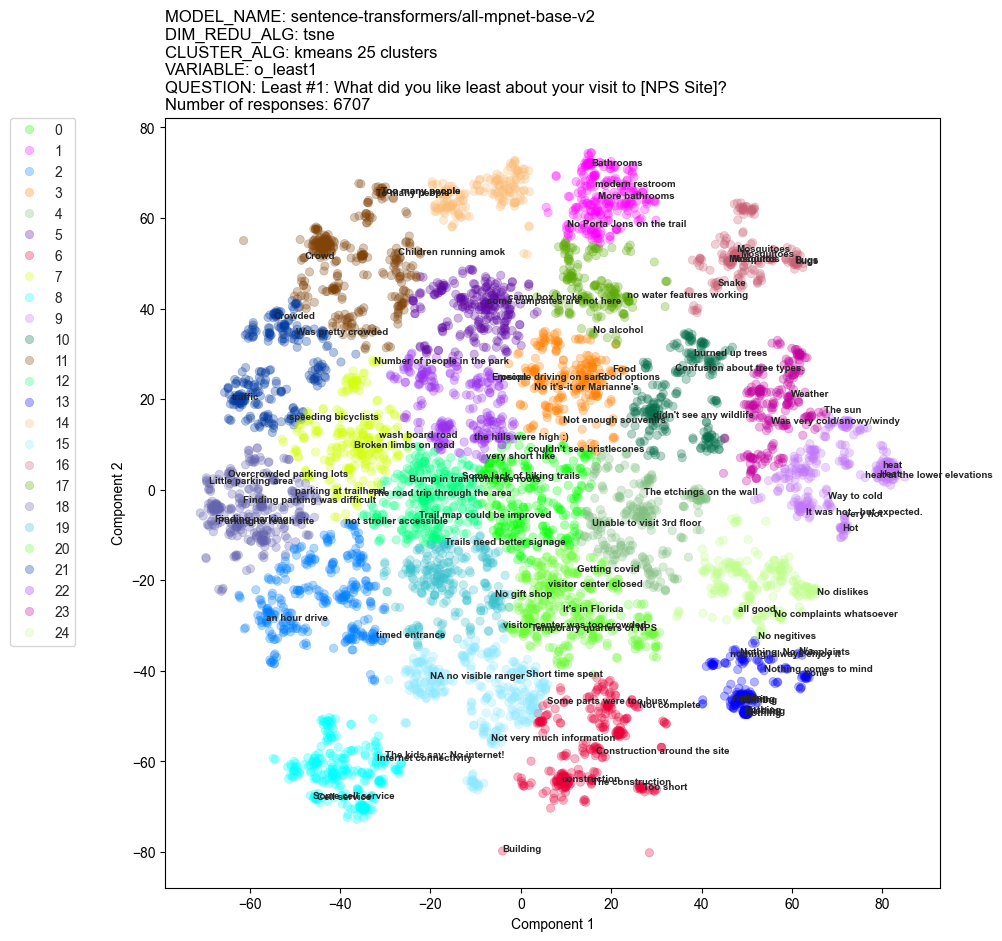

In [15]:
# DIMENSIONALITY REDUCTION
o_least1.dimension_reduce('tsne', perplexity=25)
# CLUSTERIZE
o_least1.clusterize(cluster_algorithm='kmeans', 
                    num_clusters=25)
o_least1.generate_cluster_graph(figsize=(10,10), 
                                num_annotations = 100, 
                                jitter = True, 
                                jitter_amount=0.3, 
                                hide_labels=False, 
                                hide_legend=False, 
                                save=False, 
                                max_char_length=30)

## VAR2: o_least2

In [17]:
# CREATE VECTOR EMBEDDINGS
o_least2 = NLP(coded_data['o_least2'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_least2',
                      question='Least #2: What did you like least about your visit to [NPS Site]?')

Seeds have been reset to: 42
Omitted 1 responses with more than 100 tokens
2345 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.43
Inertia: 196509.125
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

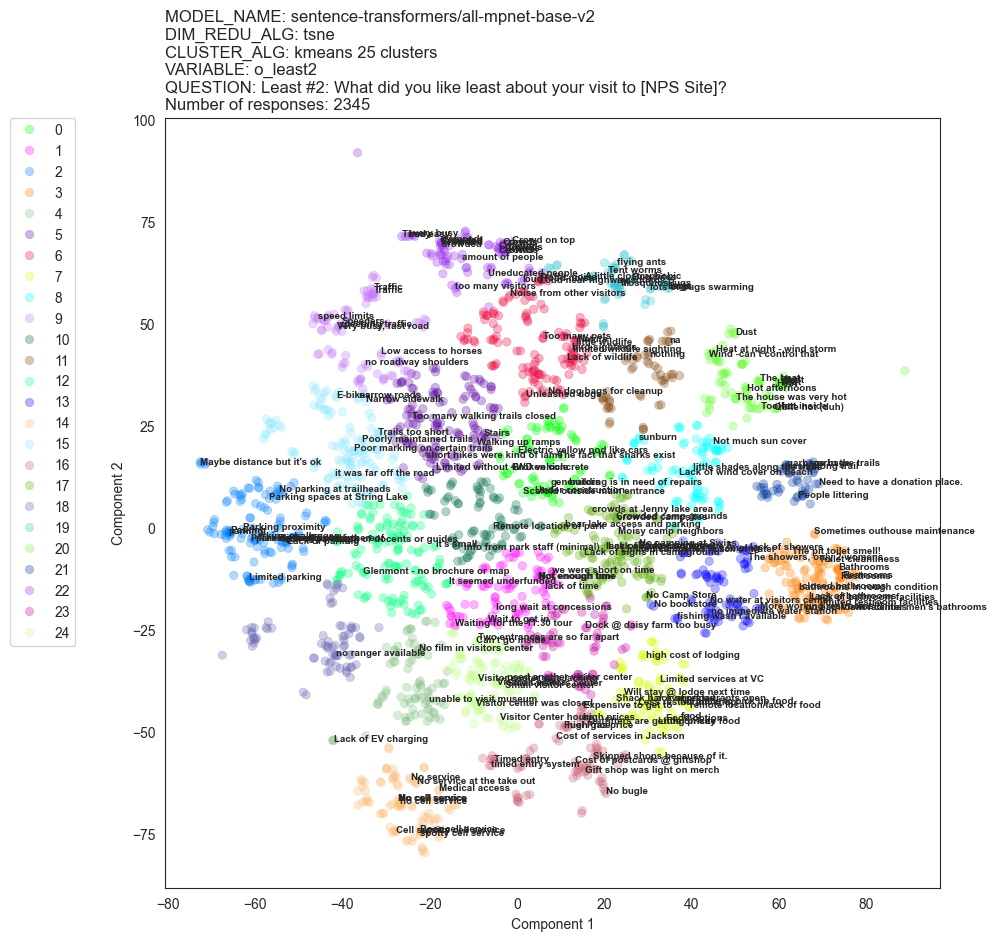

In [18]:
# DIMENSIONALITY REDUCTION
o_least2.dimension_reduce('tsne', perplexity=10)
# CLUSTERIZE
o_least2.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_least2.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR3: o_like1

In [19]:
# CREATE VECTOR EMBEDDINGS
o_like1 = NLP(coded_data['o_like1'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_like1',
                      question='Like #1: What did you like most about your visit to [NPS Site]?')

Seeds have been reset to: 42
Omitted 0 responses with more than 100 tokens
9693 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.44
Inertia: 811569.875
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

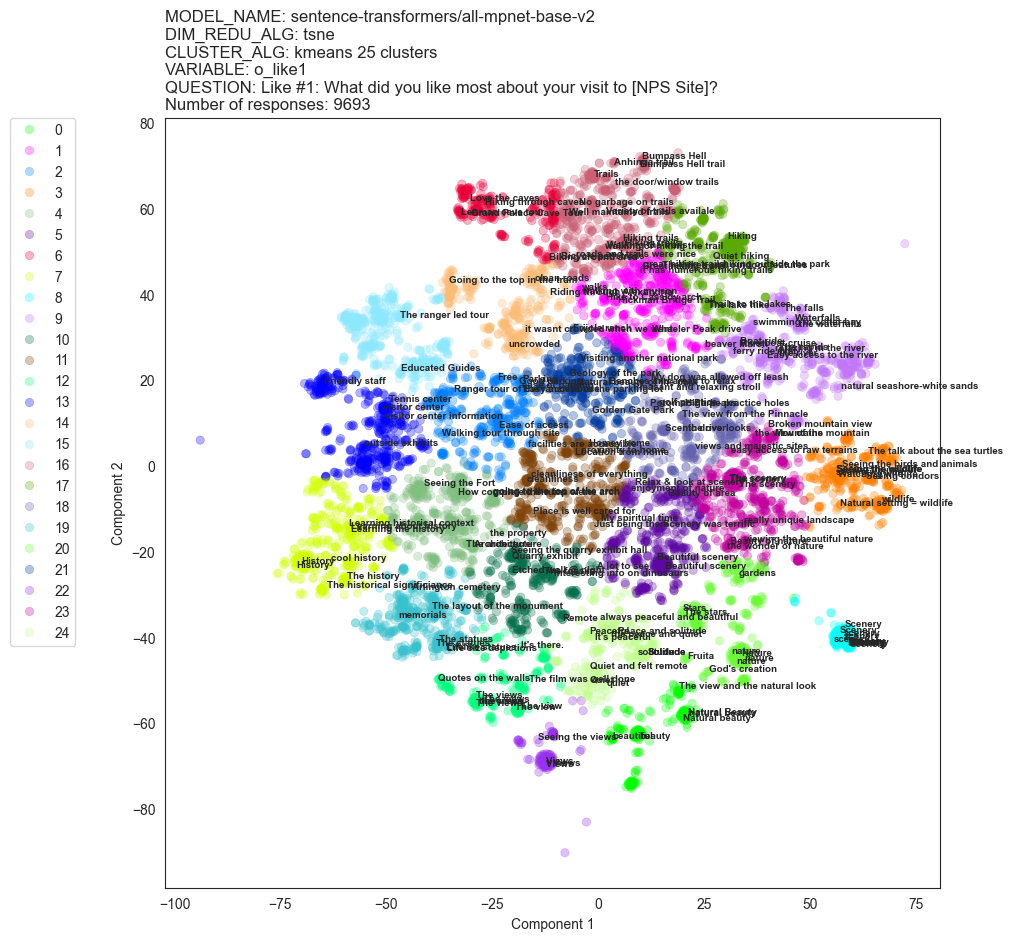

In [20]:
# DIMENSIONALITY REDUCTION
o_like1.dimension_reduce('tsne', perplexity=40)
# CLUSTERIZE
o_like1.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_like1.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR4: o_like2

In [21]:
# CREATE VECTOR EMBEDDINGS
o_like2 = NLP(coded_data['o_like2'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_like2',
                      question='Like #2: What did you like most about your visit to [NPS Site]?')

Seeds have been reset to: 42
Omitted 0 responses with more than 100 tokens
6899 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.37
Inertia: 1043140.562
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

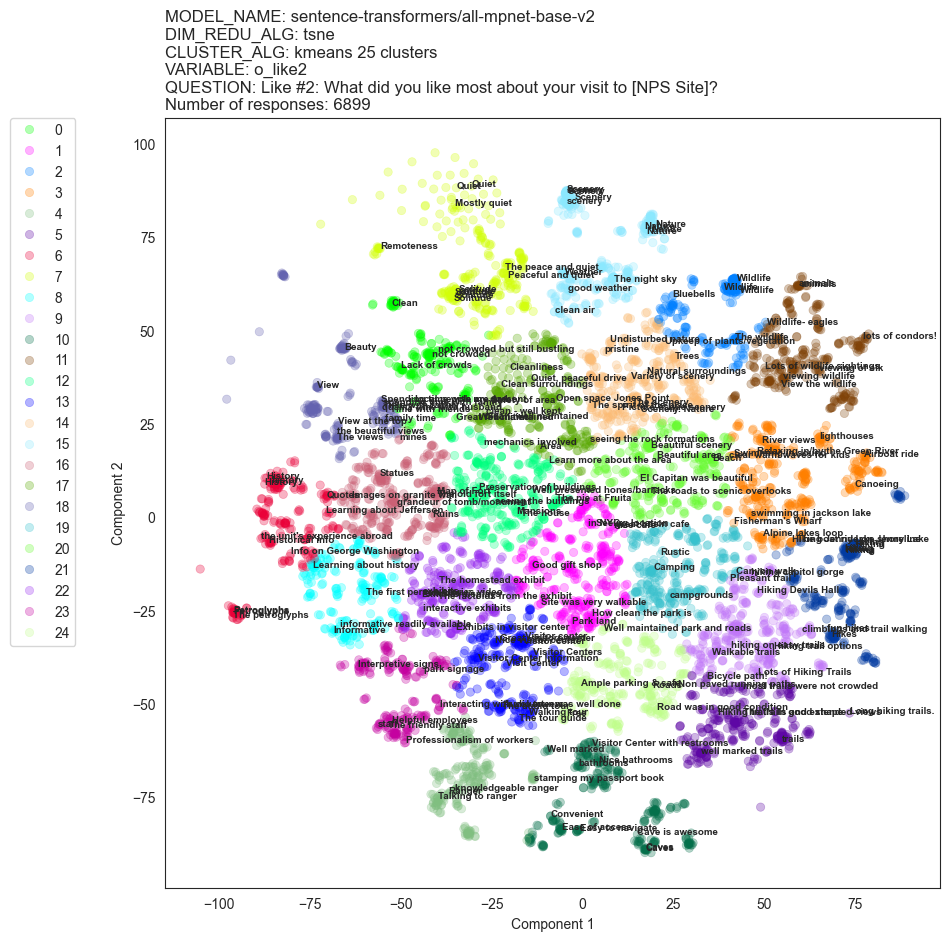

In [22]:
# DIMENSIONALITY REDUCTION
o_like2.dimension_reduce('tsne', perplexity=15)
# CLUSTERIZE
o_like2.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_like2.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR5: o_expect1

In [23]:
# CREATE VECTOR EMBEDDINGS
o_expect1 = NLP(coded_data['o_expect1'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_expect1',
                      question='Specification: Why expectations not entirely met')

Seeds have been reset to: 42
Omitted 2 responses with more than 100 tokens
512 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.47
Inertia: 29270.293
Seeds have been reset to: 42
Annotated 170 Sentences


<Figure size 1000x1000 with 0 Axes>

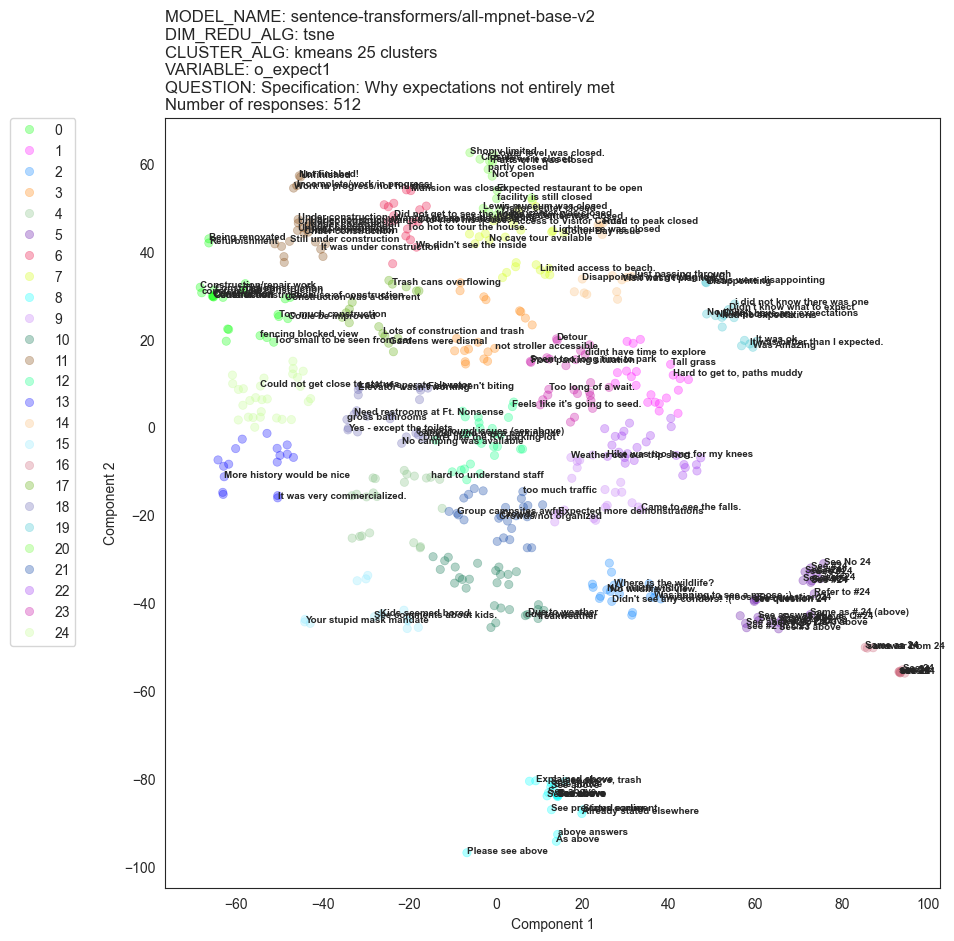

In [24]:
# DIMENSIONALITY REDUCTION
o_expect1.dimension_reduce('tsne', perplexity=5)
# CLUSTERIZE
o_expect1.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_expect1.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR6: o_sig

In [25]:
# CREATE VECTOR EMBEDDINGS
o_sig = NLP(coded_data['o_sig'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_sig',
                      question='In your opinion, what is that national significance of this park?')

Seeds have been reset to: 42
Omitted 10 responses with more than 100 tokens
8392 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.36
Inertia: 1542781.250
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

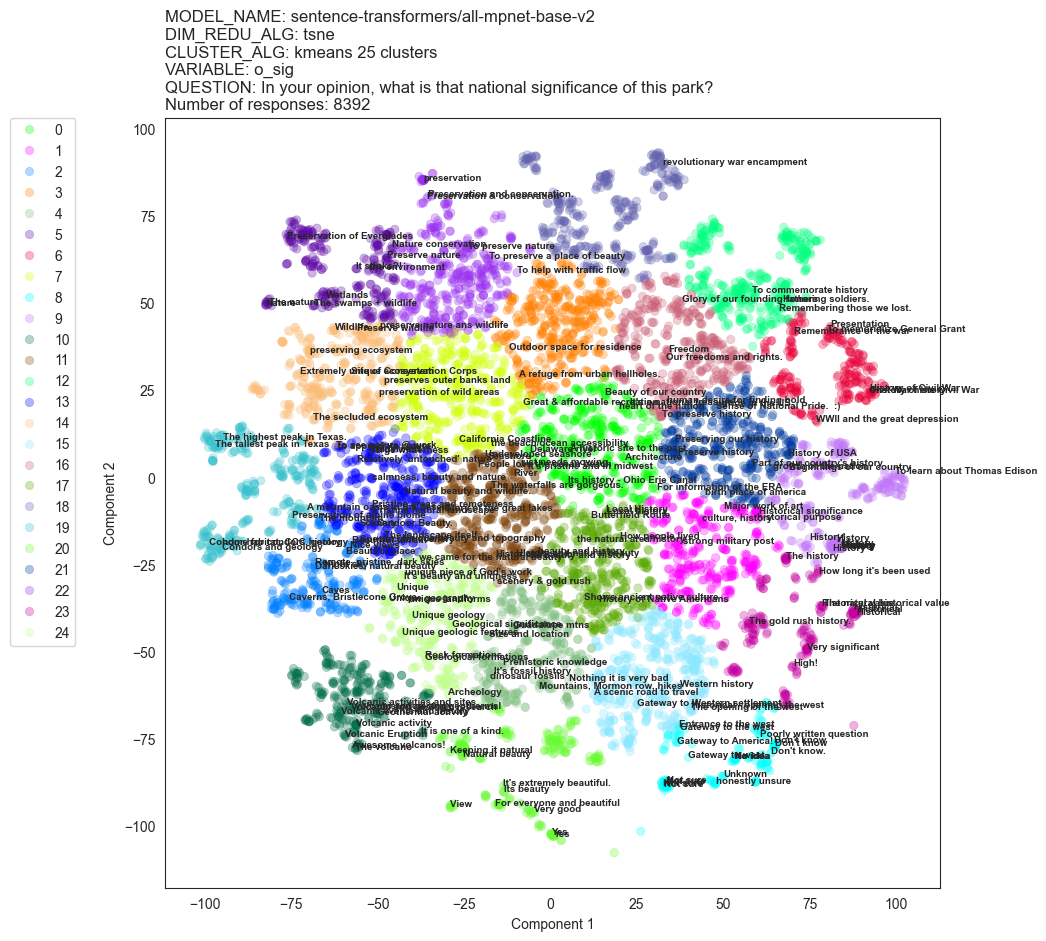

In [26]:
# DIMENSIONALITY REDUCTION
o_sig.dimension_reduce('tsne', perplexity=10)
# CLUSTERIZE
o_sig.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_sig.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR7: o_addl

In [27]:
# CREATE VECTOR EMBEDDINGS
o_addl = NLP(coded_data['o_addl'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_addl',
                      question='Is there anything else you would like to tell us about [NPS Site]’s facilities, services, or recreational opportunities?')

Seeds have been reset to: 42
Omitted 42 responses with more than 100 tokens
4202 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.37
Inertia: 545799.125
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

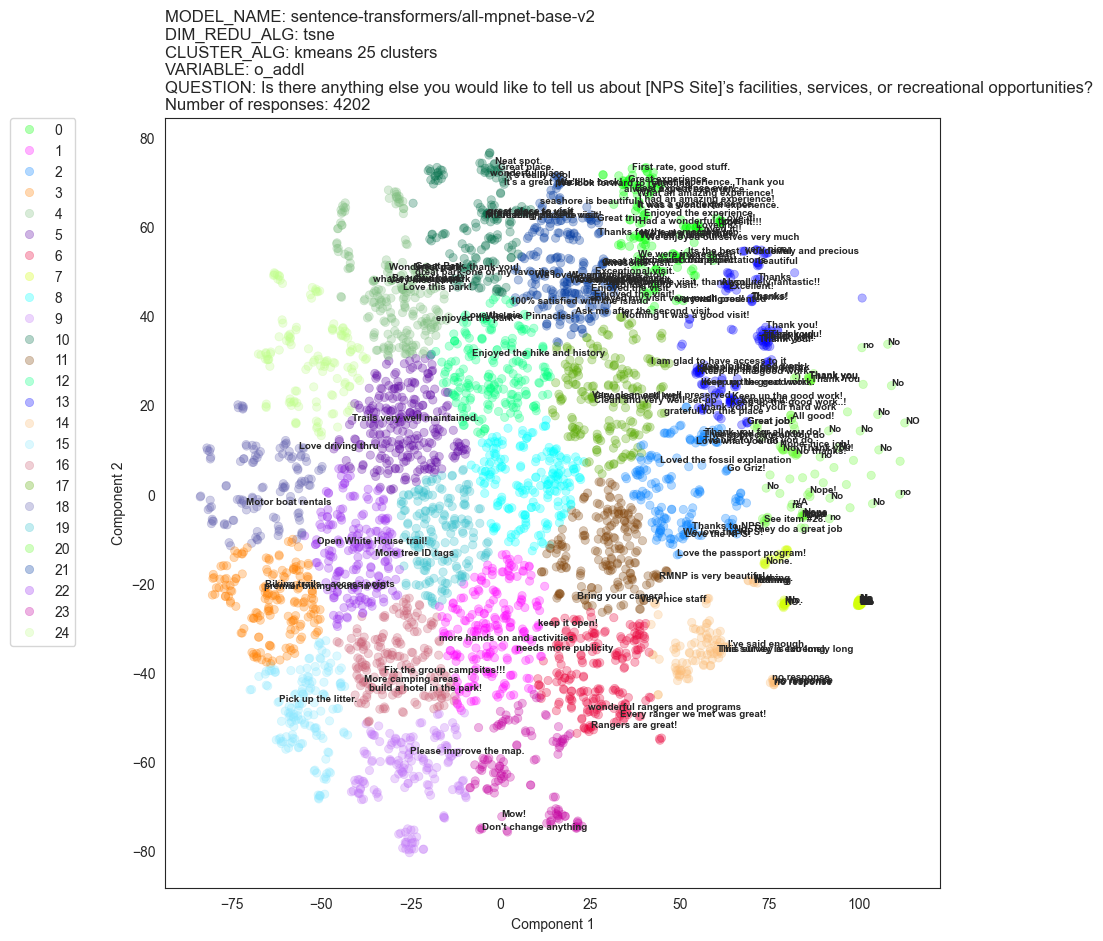

In [28]:
# DIMENSIONALITY REDUCTION
o_addl.dimension_reduce('tsne', perplexity=10)
# CLUSTERIZE
o_addl.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_addl.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR8: o_disability

In [29]:
# CREATE VECTOR EMBEDDINGS
o_disability = NLP(coded_data['o_disability'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_disability',
                      question='What activities, services, or facilities did the person(s) have difficulty participating in or accessing?')

Seeds have been reset to: 42
Omitted 2 responses with more than 100 tokens
748 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.47
Inertia: 45818.008
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

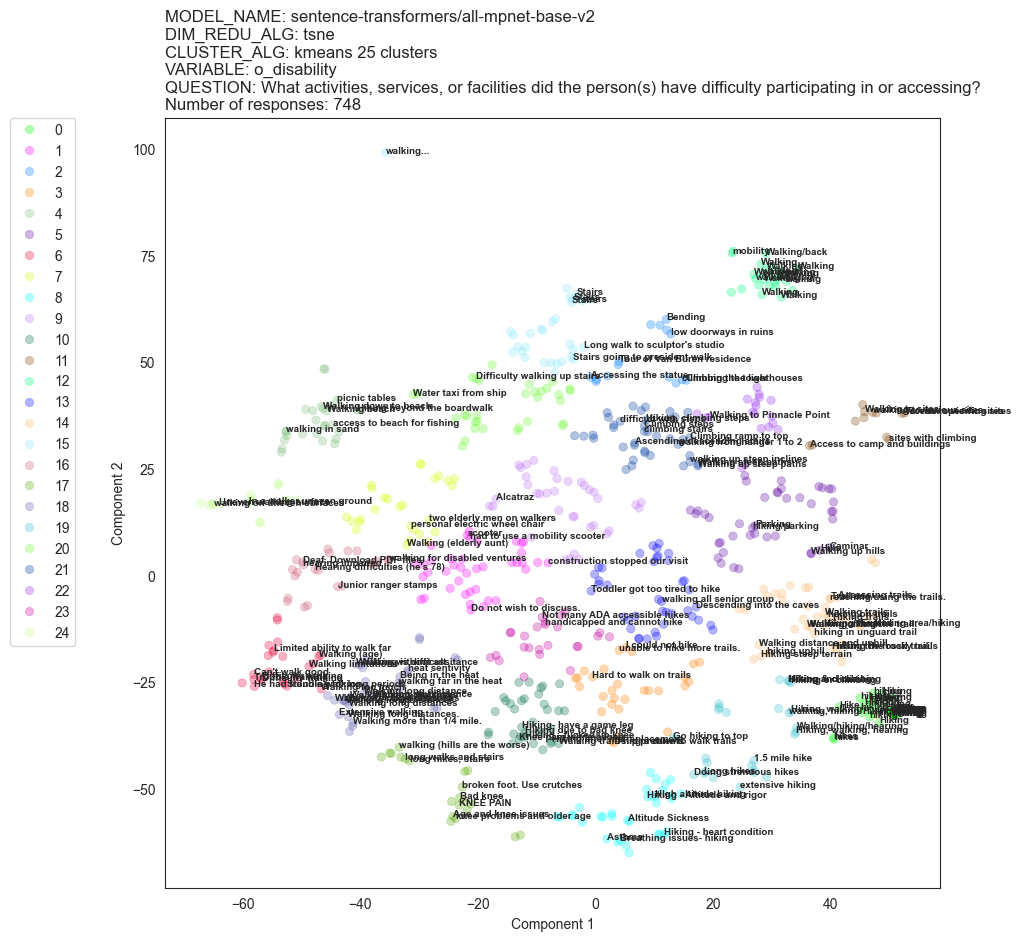

In [30]:
# DIMENSIONALITY REDUCTION
o_disability.dimension_reduce('tsne', perplexity=5)
# CLUSTERIZE
o_disability.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_disability.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR9: o_subjects

In [31]:
# CREATE VECTOR EMBEDDINGS
o_subjects = NLP(coded_data['o_subjects'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_subjects',
                      question='What specific subjects you would like to learn about at this site in the future?')

Seeds have been reset to: 42
Omitted 0 responses with more than 100 tokens
3087 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.39
Inertia: 336456.719
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

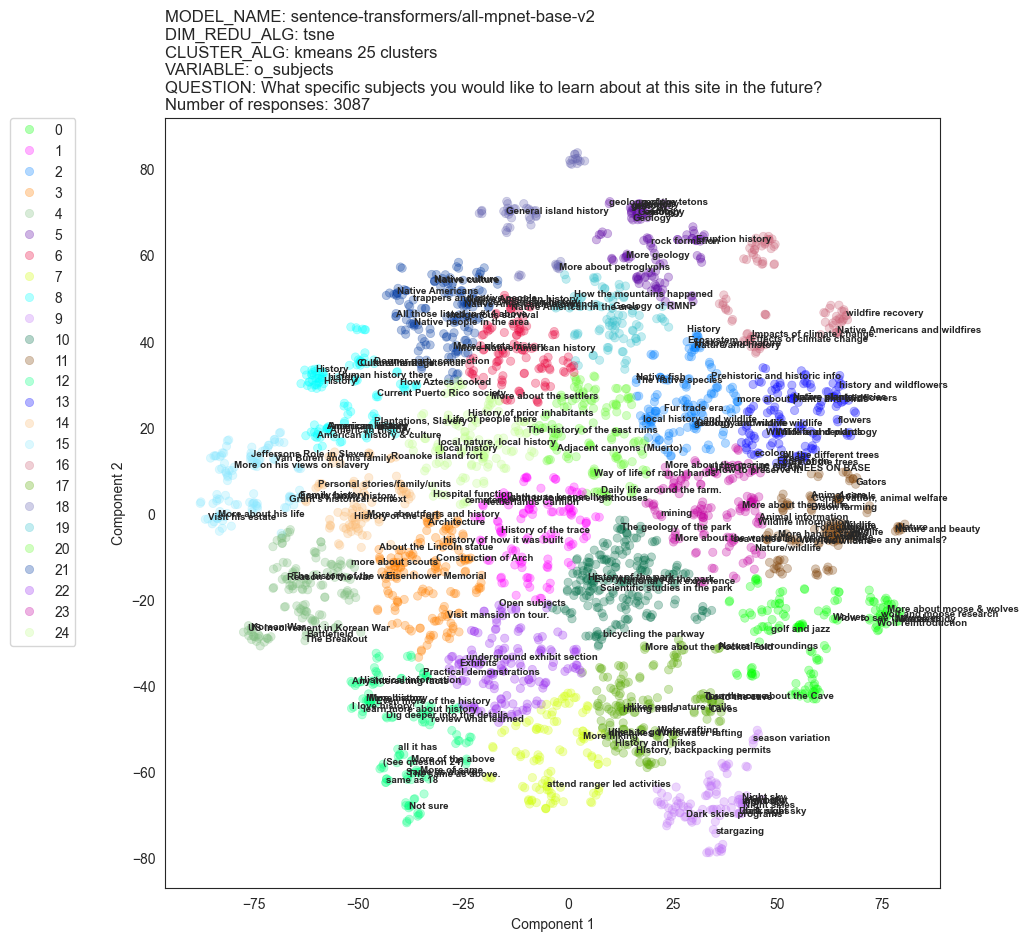

In [32]:
# DIMENSIONALITY REDUCTION
o_subjects.dimension_reduce('tsne', perplexity=10)
# CLUSTERIZE
o_subjects.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_subjects.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR10: o_history

In [33]:
# CREATE VECTOR EMBEDDINGS
o_history = NLP(coded_data['o_history'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_history',
                      question='What did you learn from park staff, programs, and/or exhibits about American history, nature, and/or culture?')

Seeds have been reset to: 42
Omitted 2 responses with more than 100 tokens
5324 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 25
Silhouette coefficient: 0.41
Inertia: 457506.375
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

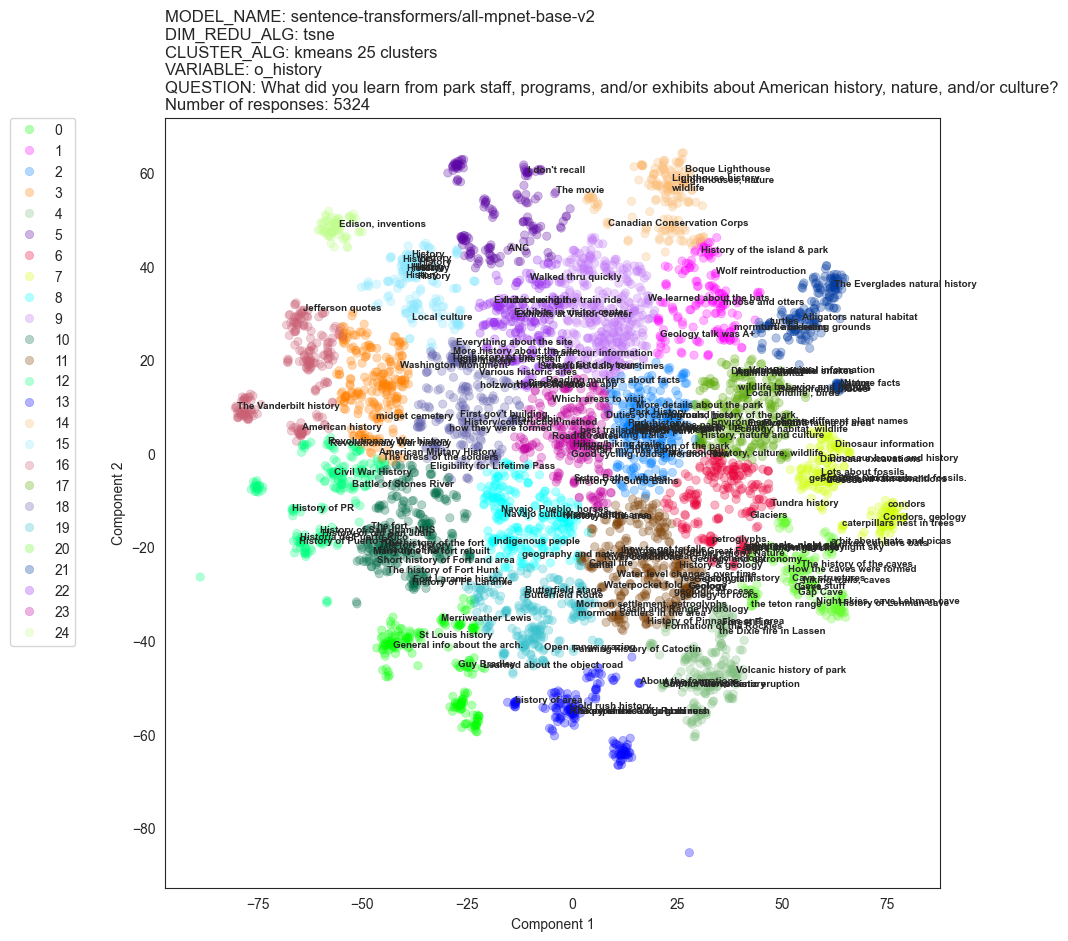

In [34]:
# DIMENSIONALITY REDUCTION
o_history.dimension_reduce('tsne', perplexity=25)
# CLUSTERIZE
o_history.clusterize(cluster_algorithm='kmeans', num_clusters=25)
o_history.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR11: o_type

In [35]:
# CREATE VECTOR EMBEDDINGS
o_type = NLP(coded_data['o_type'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_type',
                      question='Specification: Type of group')

Seeds have been reset to: 42
Omitted 0 responses with more than 100 tokens
275 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 10
Silhouette coefficient: 0.46
Inertia: 129902.625
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

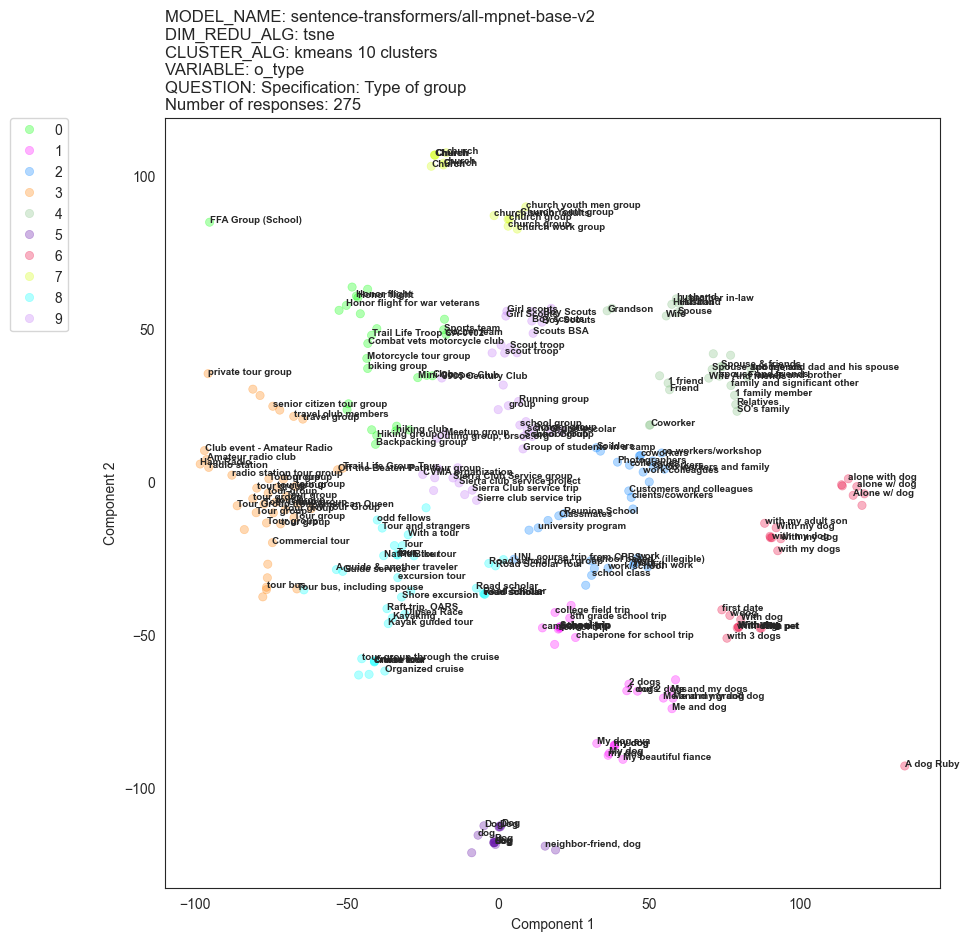

In [36]:
# DIMENSIONALITY REDUCTION
o_type.dimension_reduce('tsne', perplexity=5)
# CLUSTERIZE
o_type.clusterize(cluster_algorithm='kmeans', num_clusters=10)
o_type.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## VAR12: o_infoneed

In [37]:
# CREATE VECTOR EMBEDDINGS
o_infoneed = NLP(coded_data['o_infoneed'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_infoneed',
                      question='Specification: Information needed')

Seeds have been reset to: 42
Omitted 1 responses with more than 100 tokens
708 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 20
Silhouette coefficient: 0.38
Inertia: 74558.914
Seeds have been reset to: 42
Annotated 127 Sentences


<Figure size 1000x1000 with 0 Axes>

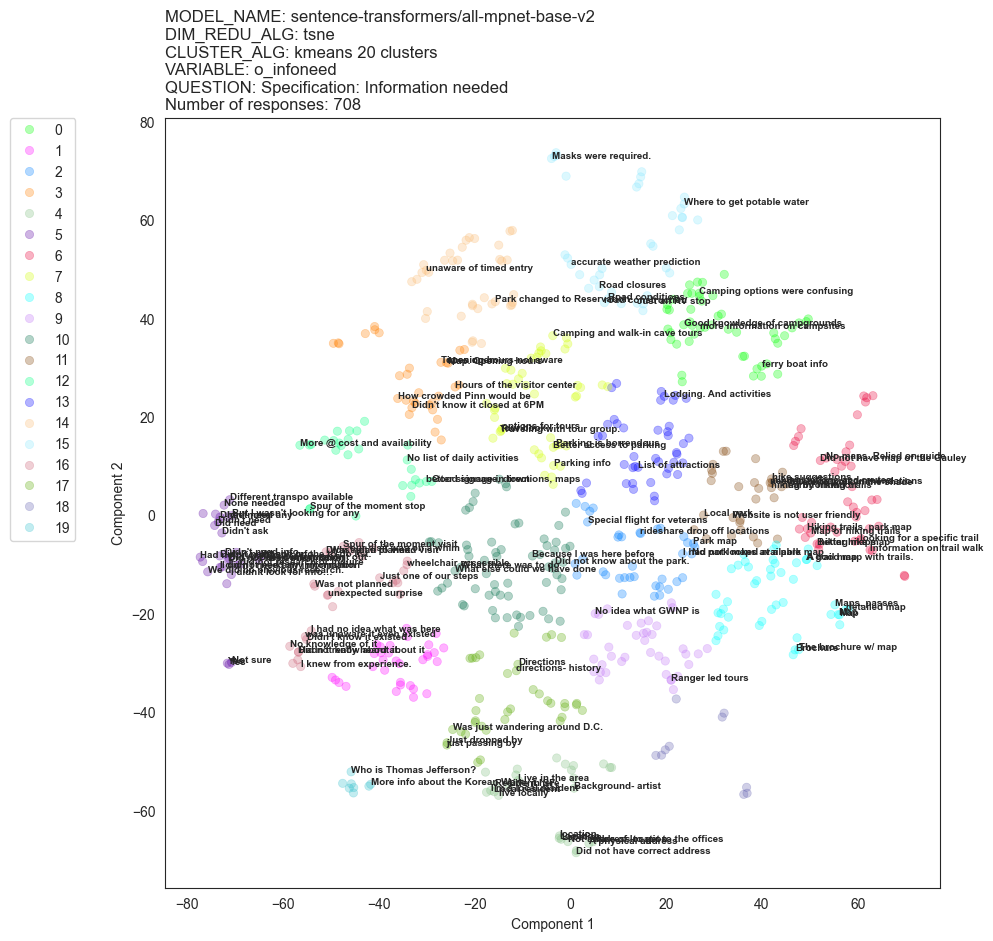

In [38]:
# DIMENSIONALITY REDUCTION
o_infoneed.dimension_reduce('tsne', perplexity=5)
# CLUSTERIZE
o_infoneed.clusterize(cluster_algorithm='kmeans', num_clusters=20)
o_infoneed.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

In [184]:
%run clusterTransformers.py

## VAR13: o_tech_other

In [39]:
# CREATE VECTOR EMBEDDINGS
o_tech_other = NLP(coded_data['o_tech_other'].iloc[:], 
                      model_name='sentence-transformers/all-mpnet-base-v2', 
                      variable = 'o_tech_other',
                      question='Specification: Other use for personal electronic devices')

Seeds have been reset to: 42
Omitted 0 responses with more than 100 tokens
875 total samples
Tokenized
Computed Embeddings
Performed Pooling
Normalized Embeddings
Successfully Embedded


Seeds have been reset to: 42
Reduced dimensions to 2 using TSNE
Seeds have been reset to: 42
Clustered using KMEANS
For n_clusters = 15
Silhouette coefficient: 0.59
Inertia: 120815.625
Seeds have been reset to: 42
Annotated 200 Sentences


<Figure size 1000x1000 with 0 Axes>

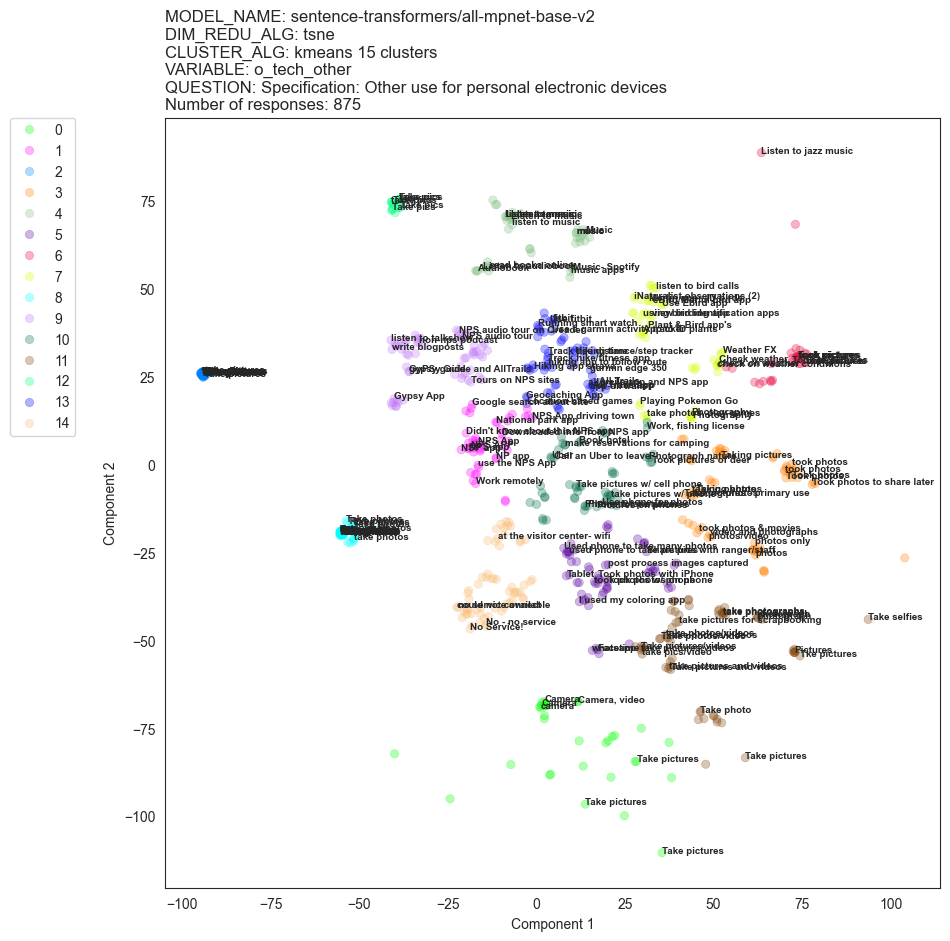

In [40]:
# DIMENSIONALITY REDUCTION
o_tech_other.dimension_reduce('tsne', perplexity=5)
# CLUSTERIZE
o_tech_other.clusterize(cluster_algorithm='kmeans', num_clusters=15)
o_tech_other.generate_cluster_graph(figsize=(10,10), num_annotations = 200, jitter = True, jitter_amount=0.3, hide_labels=False, hide_legend=False, save=False, max_char_length=30)

## Saving Data

### Models

In [41]:
# 
models_data = merge_model_data(models = [o_least1, o_least2, o_like1, o_like2, o_expect1, o_sig, o_addl, o_disability, o_subjects, o_history, o_type, o_infoneed, o_tech_other])

save_data(models_data, 'models_data', parquet=True)

Saving Data(.parquet)...
Saving Data(.xlsx)...
SUCCESS: models_data Data Saved.


# FOR DOCUMENTATION PURPOSES

In [15]:
o_least1.sentence_embeddings

tensor([[-0.0397,  0.0024, -0.0161,  ...,  0.0184,  0.0094, -0.0040],
        [-0.0003,  0.0382, -0.0056,  ..., -0.0373, -0.0274,  0.0375],
        [-0.0064,  0.0118, -0.0226,  ...,  0.0280, -0.0155,  0.0165],
        ...,
        [-0.0242,  0.0331, -0.0310,  ..., -0.0477, -0.0155, -0.0208],
        [-0.0628, -0.0126, -0.0447,  ..., -0.0075, -0.0040, -0.0128],
        [ 0.0056, -0.0188,  0.0022,  ...,  0.0179, -0.0313,  0.0089]])

(3292, 768) (3292, 6)


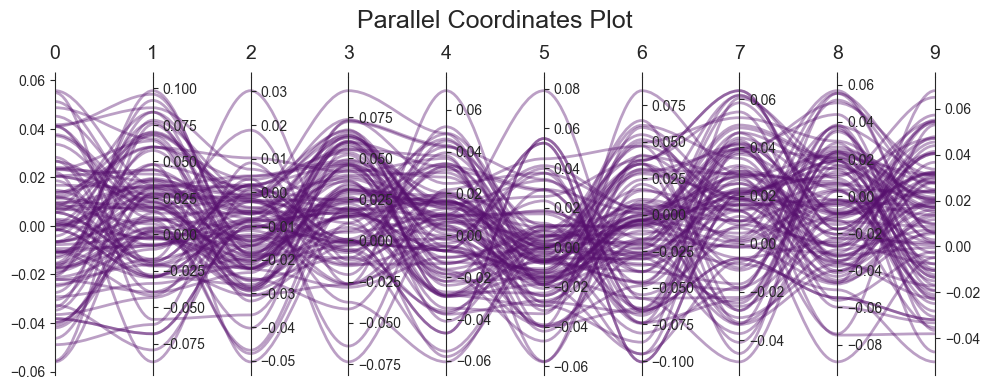

In [20]:
vecs = pd.DataFrame(o_least1.sentence_embeddings)
docs = o_least1.datapoints
print(vecs.shape, docs.shape)
docs = docs[(docs['cluster'] == 1)].reset_index(drop=True)
docs = docs.loc[0:100]
vecs = vecs.loc[docs.index, 0:9].reset_index(drop=True)
docs


from matplotlib.path import Path
import matplotlib.patches as patches
ynames = vecs.columns
ys = vecs
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05

# ymaxs[1], ymins[1] = ymins[1], ymaxs[1]  # reverse axis 1 to have less crossings
# dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys.iloc[:, 0]
zs[:, 1:] = (ys.iloc[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]

fig, host = plt.subplots(figsize=(10,4))

axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot', fontsize=18, pad=12)

colors = [plt.cm.inferno(index) for index in np.linspace(0, 1, 5)]

legend_handles = [None for _ in np.arange(0, max(docs.cluster) + 1)]
for j in range(ys.shape[0]):
    # create bezier curves
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=2, alpha=0.4, edgecolor=colors[docs.cluster[j]])
    legend_handles[docs.cluster.to_numpy()[j]] = patch
    host.add_patch(patch)
plt.tight_layout()
plt.show()
fig.savefig(r'../Writeup Files/Figures/parallel_coord_plot.png', transparent=True)

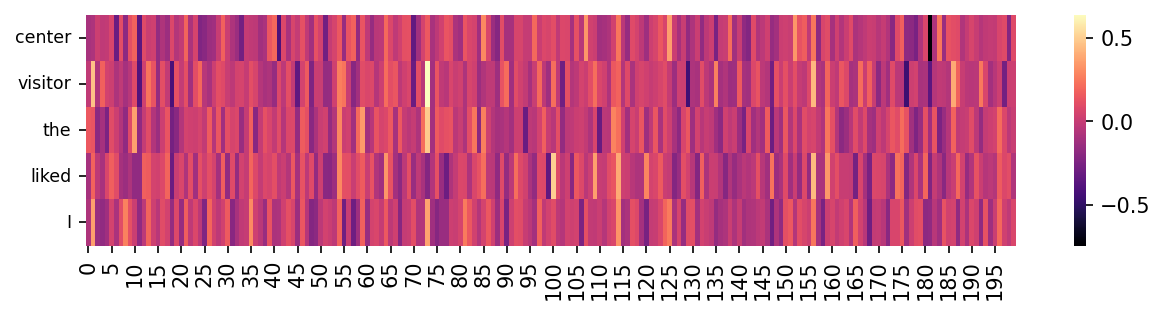

In [35]:
# using sentence-transformers/all-mpnet-base-v2 model, get vector embeddings for each datapoint
# words = ['hate', 'like']
words = "I liked the visitor center".split()
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')
embeddings = tokenizer(words, return_tensors='pt', padding=False)
with torch.no_grad():
    embeddings = model(**embeddings)
embeddings = pd.DataFrame([embeddings[0].numpy()[i][1][:200] for i in range(len(words))])
embeddings.index = words
plt.figure(figsize=(10, 2), dpi=150)
sns.heatmap(embeddings[embeddings.columns[:]], linewidth=0, cmap='magma')
plt.gca().invert_yaxis()
# plt.gca().set_facecolor("none")
plt.tick_params(axis='y', labelsize='small')
plt.savefig(r'../Writeup Files/Figures/embedding-heatmap.png', transparent=True)

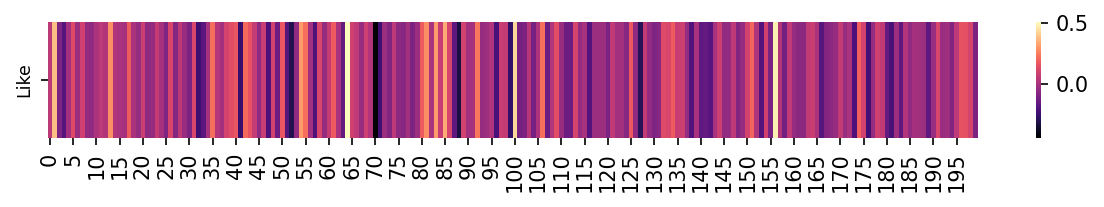

In [37]:
# using sentence-transformers/all-mpnet-base-v2 model, get vector embeddings for each datapoint
# words = ['hate', 'like']
words = "Like".split()
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-mpnet-base-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-mpnet-base-v2')
embeddings = tokenizer(words, return_tensors='pt', padding=False)
with torch.no_grad():
    embeddings = model(**embeddings)
embeddings = pd.DataFrame([embeddings[0].numpy()[i][1][:200] for i in range(len(words))])
embeddings.index = words
plt.figure(figsize=(10, 1), dpi=150)
sns.heatmap(embeddings[embeddings.columns[:]], linewidth=0, cmap='magma')
plt.gca().invert_yaxis()
# plt.gca().set_facecolor("none")
plt.tick_params(axis='y', labelsize='small')
plt.savefig(r'../Writeup Files/Figures/mean-pooled.png', transparent=True)

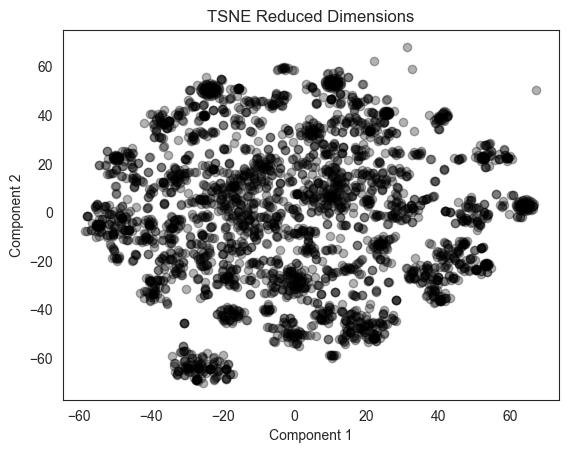

In [15]:
data = o_least1.datapoints
fig = plt.figure()
plt.scatter(data['component1'], data['component2'], color='black', alpha=0.3)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TSNE Reduced Dimensions')
plt.show()
fig.savefig(r'../Writeup Files/Figures/reduced_dim.png', transparent=True)

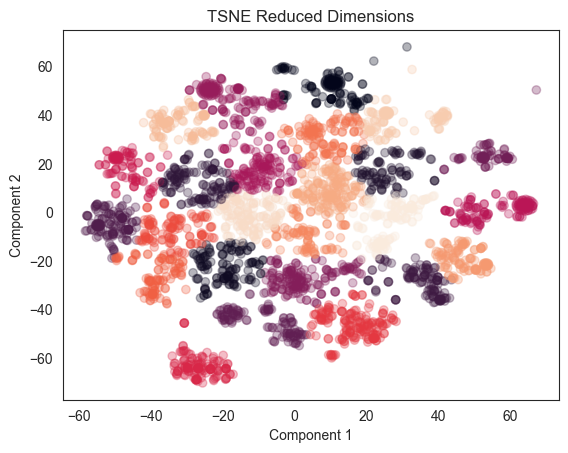

In [16]:
data = o_least1.datapoints
fig = plt.figure()
plt.scatter(data['component1'], data['component2'], c=data['cluster'], alpha=0.3)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TSNE Reduced Dimensions')
plt.show()
fig.savefig(r'../Writeup Files/Figures/clusters.png', transparent=True)

In [17]:
data_sorted1 = data.loc[(data['cluster'] == 13)].head(50)
data_sorted2 = data.loc[(data['cluster'] == 7)].head(50)
data_sorted = pd.concat([data_sorted1, data_sorted2])
print(data_sorted.shape)
data_sorted

(100, 6)


component1  component2  \
42    -26.811449  -62.557995   
43    -30.699625  -45.505035   
120   -26.932535  -61.044762   
135   -30.688263  -45.491871   
180   -26.819979  -64.098030   
...          ...         ...   
2613   53.127155   18.684109   
2622   53.119274   22.601770   
2702   59.522583   22.287218   
2755   57.084431   24.050550   
2758   50.660046   25.419603   

                                               sentance  orig_index  cluster  \
42                           Lack of cell phone service         126       13   
43                                               Remote         127       13   
120      wish we had cell service, but wasn't necessary         347       13   
135                                          Way remote         392       13   
180                                lack of cell service         507       13   
...                                                 ...         ...      ...   
2613                     The snakes that we encountered       13894        7   
2622                                         Mosquitoes       13937        7   
2702                                               Bugs       14601        7   
2755  The bugs were annoying, but I'm not about to s...       15030        7   
2758                        Mice & spiders in the cabin       15053        7   

                                              colorCode  
42                                      (0.0, 0.0, 1.0)  
43                                      (0.0, 0.0, 1.0)  
120                                     (0.0, 0.0, 1.0)  
135                                     (0.0, 0.0, 1.0)  
180                                     (0.0, 0.0, 1.0)  
...                                                 ...  
2613  (0.828208758407564, 0.9978653795143734, 0.0363...  
2622  (0.828208758407564, 0.9978653795143734, 0.0363...  
2702  (0.828208758407564, 0.9978653795143734, 0.0363...  
2755  (0.828208758407564, 0.9978653795143734, 0.0363...  
2758  (0.828208758407564, 0.9978653795143734, 0.0363...  

[100 rows x 6 columns]

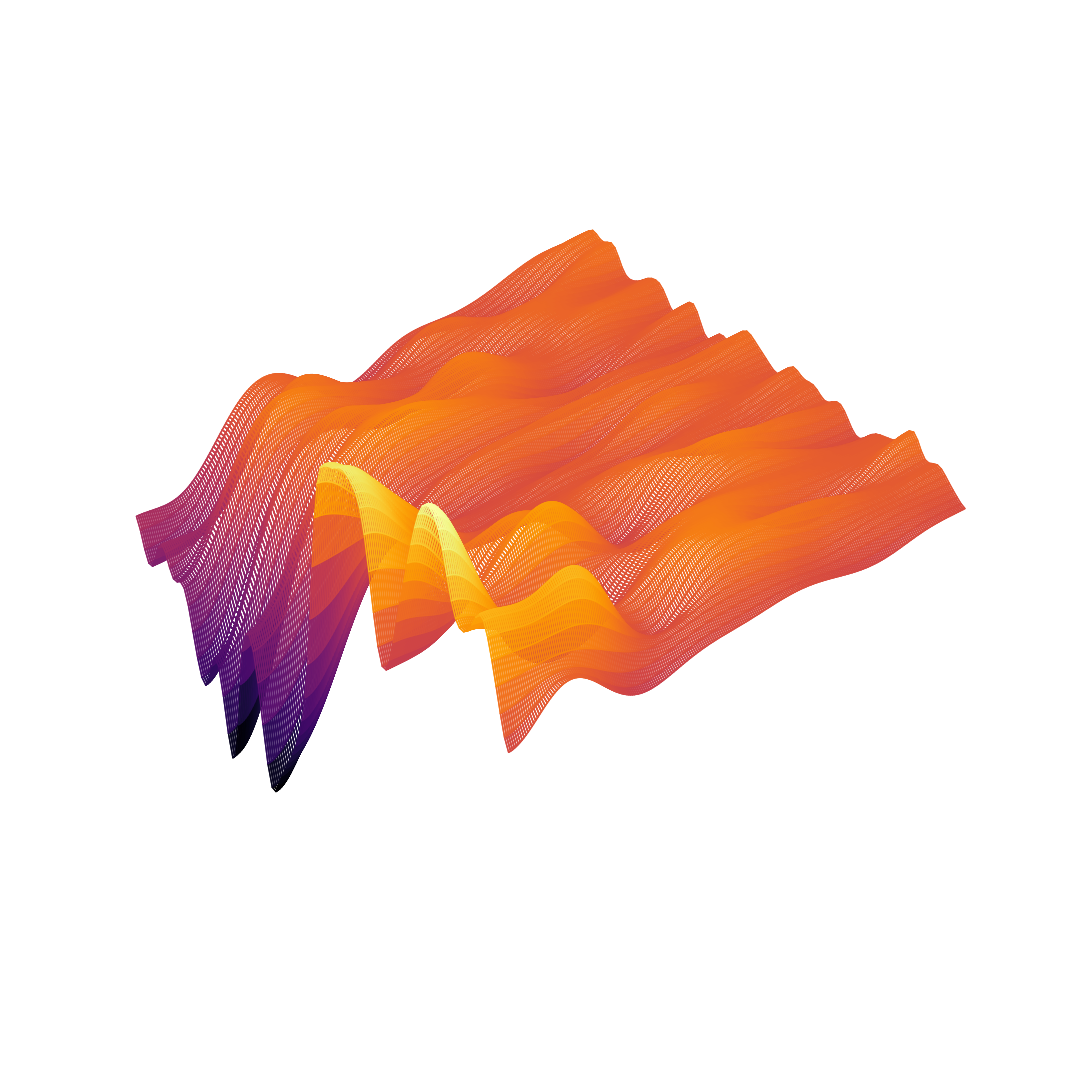

In [18]:
from scipy.ndimage.filters import gaussian_filter
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

vecs = pd.DataFrame(o_least1.sentence_embeddings)
pca = PCA(n_components=250)
vecs = pd.DataFrame(pca.fit_transform(vecs))
vecs = vecs.loc[data_sorted.index]

# Reverse Vector Matrix
# vecs = vecs.iloc[:, ::-1]

X = np.arange(vecs.shape[0])
Y = np.arange(vecs.shape[1])
X, Y = np.meshgrid(X, Y)

vecs = vecs.T.apply(lambda row: gaussian_filter(row, sigma=20)).T
vecs = pd.DataFrame(gaussian_filter(vecs, sigma=2))
Z = vecs.to_numpy().T

C = vecs.to_numpy().T
scamap = plt.cm.ScalarMappable(cmap='inferno')
fcolors = scamap.to_rgba(C)
rcount, ccount, _ = fcolors.shape

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, facecolors=fcolors, shade=False, rcount=rcount, ccount=ccount)
surf.set_facecolor((0,0,0,0))

fig.set_figwidth(18)
fig.set_figheight(18)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax.view_init(35, -40)
ax.set_axis_off()
ax.set_facecolor((1, 1, 1))

# Create the scatter plot
surf = ax.plot_surface(X, Y, Z, facecolors=fcolors, shade=False, rcount=rcount, ccount=ccount)
surf.set_facecolor((0,0,0,0))

# Calculate the min and max values of the plot
plot_min = np.min(Z)
plot_max = np.max(Z)

# Add a color bar as a legend
scamap.set_array([])
cbar = plt.colorbar(scamap, ax=ax, shrink=0.5, orientation='vertical', pad=0.1, aspect=20, ticks=[plot_min, plot_max])
cbar.set_label('Color Legend')
cbar.ax.set_yticklabels([f'{plot_min:.2f}', f'{plot_max:.2f}'])

cbar.remove() # Get rid of colorbar
plt.show()
fig.savefig(r'../Writeup Files/Figures/vector-cloth-transparent.png', transparent=True, dpi=300)

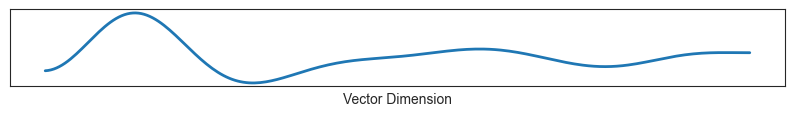

In [37]:
# Take row 99 as an example and plot that line
fig, ax = plt.subplots(figsize=(10, 1))  # Adjust the width and height here
ax.plot(vecs.iloc[99], linewidth=2)  # Change line width here
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Vector Dimension')
# save the figure
plt.show()
fig.savefig(r'../Writeup Files/Figures/dashed-example.png', transparent=False, dpi=300)